In [1]:
%load_ext autoreload
%autoreload 2

## Directories

- data
   - Data directory. often symlinked to a filesystem with lots of space
  
- data/raw
  - Raw (immutable) hash-verified downloads
  
- data/interim
  - Extracted and interim data representations, such as caches
  
- data/processed
  - The final, cleaned and processed data sets for modeling.


In [2]:
from src.paths import raw_data_path, interim_data_path

## Raw data:


In [3]:
from src.data import localdata

In [11]:
from src.data.localdata import read_raw_dmps
from src.data.inverter import invert

import datetime


date = datetime.datetime(2016,1,23)
data = read_raw_dmps(date)
inv_data = invert(data)

/tmp/ipykernel_145621/1003779087.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(inv_data.index, inv_data.columns, np.log10(abs(inv_data.values[::1, ::1].T)+1e-6), cmap='jet')


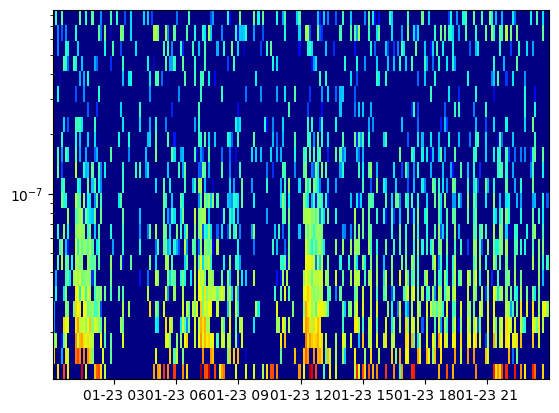

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.pcolor(inv_data.index, inv_data.columns, np.log10(abs(inv_data.values[::1, ::1].T)+1e-6), cmap='jet')
plt.clim([0, 4])

# if dp_peak[0] * .9 > 1e-8:
#     # plt.xlim([np.fix(V(1)) - 0.05, np.fix(V(1)) + 1.05])
#     plt.ylim([1e-8, dp_peak[-1] * 1.1])
# else:
#     # plt.xlim([np.fix(V(1)) - 0.05, np.fix(V(1)) + 1.05])
#     # plt.ylim((dp_peak[0] * .9, dp_peak[-1] * 1.1))
#     plt.axis(ymin=dp_peak[0]*0.9, ymax=dp_peak[-1]*1.1)

plt.yscale('log')
plt.show()


In [18]:
inv_data.head()

,1.156895e-08,1.388038e-08,1.665206e-08,1.997482e-08,2.395714e-08,2.872810e-08,3.444175e-08,4.128047e-08,4.946035e-08,5.923797e-08,...,1.727745e-07,2.060826e-07,2.457238e-07,2.929518e-07,3.492881e-07,4.165771e-07,4.970370e-07,5.933206e-07,7.085929e-07,8.466365e-07
2016-01-23 00:03:41,0.000000,539.323490,106.963874,11.577399,14.515679,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.998582
2016-01-23 00:09:37,0.000000,0.000000,168.301507,0.000000,0.000000,33.545018,15.027653,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,54.110907,0.000000
2016-01-23 00:15:33,483.118495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.352998,0.000000,46.374466,...,0.000000,0.0,0.0,32.343499,0.000000,0.0,10.606273,10.048100,0.000000,0.000000
2016-01-23 00:21:29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.984980,0.000000,...,0.000000,0.0,0.0,0.000000,1.368061,0.0,0.000000,0.000000,0.000000,31.289917
2016-01-23 00:27:25,0.000000,14.719272,3.570341,0.000000,0.000000,0.000000,0.000000,196.976948,119.122057,0.000000,...,40.045488,0.0,0.0,0.000000,0.000000,0.0,0.000000,7.111061,72.513062,0.000000


In [20]:
inv_data.columns

Float64Index([1.1568954163984316e-08, 1.3880376074804727e-08,
              1.6652062865455337e-08, 1.9974819623771262e-08,
              2.3957142988630508e-08, 2.8728098615390485e-08,
               3.444174646701231e-08,  4.128047159415498e-08,
              4.9460347162120606e-08, 5.9237967929959124e-08,
               7.091481518075428e-08,   8.48474433803625e-08,
              1.0145533693489086e-07, 1.2123412306517049e-07,
              1.4477320227413797e-07, 1.7277451512945893e-07,
              2.0608256338776823e-07, 2.4572380010895885e-07,
               2.929518488266835e-07, 3.4928813010457545e-07,
               4.165771157700041e-07,  4.970370434998486e-07,
               5.933205957679172e-07,  7.085928521958241e-07,
               8.466364989748831e-07],
             dtype='float64')

# EBAS-io

In [21]:
from ebas.io.file import nasa_ames
from nilutility.datatypes import DataObject
from ebas.domain.basic_domain_logic.time_period import estimate_period_code, \
    estimate_resolution_code, estimate_sample_duration_code

from ebas.io.ebasmetadata import DatasetCharacteristicList

import yaml

import pandas as pd
import numpy as np
import datetime

def testnan(val):
    if val * 0. == 0:
        return val
    else:
        return None

In [22]:
def set_fileglobal_metadata(nas):
    """
    Set file global metadata for the EbasNasaAmes file object

    Parameters:
        nas    EbasNasaAmes file object
    Returns:
        None
    """
    
    # All times reported to EBAS need to be in UTC!
    # Setting the timezone here explicitly should remind you to check your data
    nas.metadata.timezone = 'UTC'
    
    nas.metadata.revdate = datetime.datetime(2017, 7, 20, 13, 23, 0)
    nas.metadata.revision = '1.1a'
    nas.metadata.revdesc = 'initial revision, NRT SMPS_control_lev0 lev0 2 lev1 v.0.0_2'
   
    nas.metadata.type = 'TU'
  
    # Revision information
    nas.metadata.startdate = datetime.datetime(2016, 1, 1, 0, 0, 0) 

    nas.metadata.datalevel = '1'
    nas.metadata.period = '1y'
    nas.metadata.resolution = '5mn'
    nas.metadata.duration = '5mn'
    nas.metadata.rescode_sample = '5mn'
    
    # Data Originator Organisation
    nas.metadata.org = DataObject(
        OR_CODE='GR05L',
        OR_NAME='NCSR Demokritos',
        OR_ACRONYM='DEM', OR_UNIT='URL',
        OR_ADDR_LINE1='Ag.Paraskevi', OR_ADDR_LINE2=None,
        OR_ADDR_ZIP='15310', OR_ADDR_CITY='Athens', OR_ADDR_COUNTRY='Greece')


    # Projects the data are associated to
    nas.metadata.projects = ['GAW-WDCA', 'ACTRIS']
    
    # Station metadata
    nas.metadata.station_code = 'GR0101R'
    nas.metadata.platform_code = 'GR0101S'
    nas.metadata.station_name = u'Helmos Mountain'

    nas.metadata.station_wdca_id = 'GAWAGR__HAC'
    nas.metadata.station_gaw_id = 'HAC'
    nas.metadata.station_gaw_name = u'Helmos Mountain'
    nas.metadata.station_airs_id = ''   # N/A
    nas.metadata.station_other_ids = ''  
    nas.metadata.station_state_code = ''
    nas.metadata.station_landuse = 'gravel and Stone'
    nas.metadata.station_setting = 'Mountain'
    nas.metadata.station_gaw_type = 'R'
    nas.metadata.station_wmo_region = 6
    nas.metadata.station_latitude = 37.984265
    nas.metadata.station_longitude = 22.196262
    nas.metadata.station_altitude = 2340.0  
    
    nas.metadata.mea_latitude = 37.984265
    nas.metadata.mea_longitute = 22.196262
    nas.metadata.mea_altitude = 2340.0
    nas.metadata.mea_height = 6 
    
    # More file global metadata, but those can be overridden per variable
    # See set_variables for examples
    nas.metadata.comp_name = 'particle_number_size_distribution'
    nas.metadata.unit = '1/cm3'      
    nas.metadata.matrix = 'pm10'
    nas.metadata.lab_code = 'GR05L'
    nas.metadata.instr_type = 'smps' #MUST BE in LOWER CASE LETTERS!! OTHERWISE GIVES ERRORS
    nas.metadata.instr_name = 'SMPS-TROPOS'
    nas.metadata.instr_manufacturer ='TROPOS-TSI'
    nas.metadata.instr_model = 'TROPOS-SMPS'
    nas.metadata.instr_serialno = 'SMPS=TROPOS'
    
    nas.metadata.method = 'GR05L__NRT_SMPS_lev1'
    nas.std_method = 'SOP=Wiedensohler2012'
    
    nas.metadata.inlet_type = 'Impactor direct'
    nas.metadata.inlet_desc = 'PM10 impactor'
    nas.metadata.hum_temp_ctrl = 'Nafion dryer'
    nas.metadata.hum_temp_ctrl_desc = 'Humidity/temperature control description: sample dried to below 40% RH with nafion dryer'
    
    nas.metadata.vol_std_temp = 273.15 
    nas.metadata.vol_std_pressure = 1013.25  
    nas.metadata.detection_limit=(0, '1/cm3') 
    nas.metadata.detection_limit_desc=' Determined only by instrument counting statistics, no detection limit flag used'
    nas.metadata.uncertainty_desc='uncertainty range between instruments in intercomparison by Wiedensohler et al. 2012. (AMT)'
   
    nas.metadata.zero_negative='Zero values possible'
    nas.metadata.zero_negative_desc='Zero values may appear due to statistical variations at very low concentrations'
   
    # Data Originators (PIs)
    nas.metadata.originator = []
    nas.metadata.originator.append(
        DataObject(
            PS_LAST_NAME='Eleftheriadis', PS_FIRST_NAME='Konstantinos', PS_EMAIL='elefther@ipta.demokritos.gr',
            PS_ORG_NAME='NCSR Demokritos',
            PS_ORG_ACR='DEM', PS_ORG_UNIT='ERL',
            PS_ADDR_LINE1='Ag.Paraskevi', PS_ADDR_LINE2=None,
            PS_ADDR_ZIP='15310', PS_ADDR_CITY='Athens',
            PS_ADDR_COUNTRY='Greece',
            PS_ORCID=None,
        ))
    nas.metadata.originator.append(
        DataObject(
            PS_LAST_NAME=u'Vratolis', PS_FIRST_NAME='Stergios', PS_EMAIL='vratolis@ipta.demokritos.gr',
            PS_ORG_NAME='NCSR Demokritos',
            PS_ORG_ACR='DEM', PS_ORG_UNIT='ERL',
            PS_ADDR_LINE1='Ag.Paraskevi', PS_ADDR_LINE2=None,
            PS_ADDR_ZIP='15310', PS_ADDR_CITY='Athens',
            PS_ADDR_COUNTRY='Greece',
            PS_ORCID=None,
        ))

    # Data Submitters (contact for data technical issues)
    nas.metadata.submitter = []
    nas.metadata.submitter.append(
        DataObject(
            PS_LAST_NAME=u'Gini', PS_FIRST_NAME='Maria', PS_EMAIL='gini@ipta.demokritos.gr',
            PS_ORG_NAME='NCSR Demokritos',
            PS_ORG_ACR='DEM', PS_ORG_UNIT='ERL',
            PS_ADDR_LINE1='Ag.Paraskevi', PS_ADDR_LINE2=None,
            PS_ADDR_ZIP='15310', PS_ADDR_CITY='Athens',
            PS_ADDR_COUNTRY='Greece',
            PS_ORCID=None,
        ))

    nas.metadata.acknowledgements='Request acknowledgment details from data originator'
    nas.metadata.comment='none'
    
    return nas

In [23]:
def set_time_axes(nas, start_times_df):
    """
    Set the time axes and related metadata for the EbasNasaAmes file object.

    Parameters:
        nas    EbasNasaAmes file object
    Returns:
        None
    """
    
    # define start and end times for all samples
    start_times_list = start_times_df.tolist()
    start_times_dt_list = [start_times_list[i].to_pydatetime()for i in range(len(start_times_list))]
    
    end_times_df = start_times_df + datetime.timedelta(minutes=tresol)
    end_times_list = end_times_df.tolist()
    end_times_dt_list = [end_times_list[i].to_pydatetime()for i in range(len(start_times_list))]
    
    nas.sample_times = list(zip(start_times_dt_list,end_times_dt_list))

    #
    # Generate metadata that are related to the time axes:
    #

    # period code is an estimate of the current submissions period, so it should
    # always be calculated from the actual time axes, like this:
    nas.metadata.period = estimate_period_code(nas.sample_times[0][0], nas.sample_times[-1][1])

    # Sample duration can be set automatically
    nas.metadata.duration = estimate_sample_duration_code(nas.sample_times)
    # or set it hardcoded:
    # nas.metadata.duration = '3mo'

    # Resolution code can be set automatically
    # But be aware that resolution code is an identifying metadata element.
    # That means, several submissions of data (multiple years) will
    # only be stored as the same dataset if the resolution code is the same
    # for all submissions!
    # That might be a problem for time series with varying resolution code
    # (sometimes 2 months, sometimes 3 months, sometimes 9 weeks, ...). You
    # might consider using a fixed resolution code for those time series.
    # Automatic calculation (will work from ebas.io V.3.0.7):
    nas.metadata.resolution = estimate_resolution_code(nas.sample_times)
    # or set it hardcoded:
    # nas.metadata.resolution = '3mo'

    # It's a good practice to use Jan 1st of the year of the first sample
    # endtime as the file reference date (zero point of time axes).
    nas.metadata.reference_date = datetime.datetime(nas.sample_times[0][1].year, 1, 1)
    
    return nas

In [24]:
def set_variables(nas, df):
    """
    Set metadata and data for all variables for the EbasNasaAmes file object.

    Parameters:
        nas    EbasNasaAmes file object
        df     pd.DataFrame
        
    Returns:
        nas    EbasNasaAmes
    """
    
    #x=14
    x=first_column
    while x < last_column+1:                                                  
        col=df.take([x],axis=1)
        values=col.values.T.tolist()[0]
        values=np.array(values, dtype=np.float)
        values=[ round(elem,6) for elem in values]
        values=list(map(testnan, values))
        col_metadata=df_metadata.take([x],axis=1)
        col_flag=df.take([index_flag_col],axis=1).astype(int)
        flags=col_flag.values.tolist() 
        metadata = DataObject()
        metadata.comp_name = col_metadata[0:1].values.T.tolist()[0][0]
       
        #Unit metadata
        metadata.unit = col_metadata[1:2].values.T.tolist()[0][0]
        if metadata.unit!=metadata.unit:
            metadata.unit = None
        else:
            metadata.unit = metadata.unit
                  
        metadata.matrix=col_metadata[2:3].values.T.tolist()[0][0]
        metadata.title=col_metadata[3:4].values.T.tolist()[0][0]   
        
        #Statistics metadata
        metadata.statistics=col_metadata[4:5].values.T.tolist()[0][0]
        if metadata.statistics!=metadata.statistics:
            metadata.statistics = None
        else:
            metadata.statistics = metadata.statistics
            
        #Uncertainity metadata    
        uncertainty_value=col_metadata[5:6].values.T.tolist()[0][0]
        uncertainty_unit=col_metadata[6:7].values.T.tolist()[0][0]
        if uncertainty_value!=uncertainty_value:
            metadata.uncertainty = None
        else:
            metadata.uncertainty = (int(uncertainty_value), uncertainty_unit)
            
        

        #Characteristics    
        if col_metadata[7:8].values.T.tolist()[0][0]=='None':
            nas.variables.append(DataObject(values_=values, flags=flags, flagcol=True,
                                    metadata=metadata))
        else:
            metadata.characteristics = DatasetCharacteristicList()
            Characteristic_type=col_metadata[7:8].values.T.tolist()[0][0]
            Value=col_metadata[8:9].values.T.tolist()[0][0]
            Instrument_type=col_metadata[9:10].values.T.tolist()[0][0]
            metadata.characteristics.add_parse(Characteristic_type, Value, Instrument_type, metadata.comp_name)  
            nas.variables.append(DataObject(values_=values, flags=flags, flagcol=True,
                                metadata=metadata))

            
        #nas.variables.append(DataObject(values_=values, flags=flags, flagcol=True,
                                    #metadata=metadata))
                                    #
        x+=1  
        
    return nas

In [25]:
f = r'../config/Level1_final.txt'

first_column = 1 # (first column with variable to process) 
last_column = 75 # (last column to process)
index_flag_col = 76 #(nb column with flag data)
tresol = 5 #sample duration

df = pd.read_csv(f, delimiter=',', header=0, engine='python')  #Specify nb_lines of header, delimiter etc

df = df.where((pd.notnull(df)), None) #Replace nan values with None
start_times_df = pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S') #Specify format of datetime column to read. The column in called by the header name
names=list(df.columns.values) 
numb_col=df.shape[1]

# INPUT METADATA_VARIABLES !!!! 
# METADATA and INPUT FILES MUST HAVE THE SAME NUMBER OF COLUMNS AND IN THE SAME ORDER AND POSITION!!
f_metadata=r'../config/Input_metadata_lev1.csv'
df_metadata=pd.read_csv(f_metadata, delimiter=',', header=0)


In [26]:
nas = nasa_ames.EbasNasaAmes()

In [27]:
nas = set_fileglobal_metadata(nas)

In [28]:
with open('../config/ebas_metadata.yml', 'wt') as conf_file:
    yaml.dump(dict(nas.metadata), conf_file)

In [29]:
nas = set_time_axes(nas, start_times_df)

In [30]:
nas = set_variables(nas, df)

In [31]:
nas.write(createfiles=True, destdir='.')